<a href="https://colab.research.google.com/github/jimmycool/google-colab/blob/master/Copy_of_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras as ks

In [ ]:
import pandas as pd

In [ ]:
pd1=pd.read_csv("./fashion-mnist_train.csv")
pd2=pd.read_csv("./fashion-mnist_test.csv")
y=pd1.head(60000)['label']
x=pd1.head(60000)
x2=pd2.head(10000)
y2=pd2.head(10000)['label']
x1=pd1.drop(['label'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.33, random_state=42)

In [ ]:
pd1.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

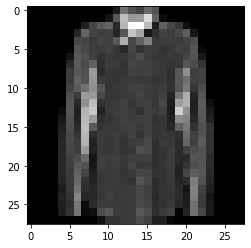

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
xcv1=(np.array(X_train))
xc2=[]
for t in xcv1:
    xc2.append(t.reshape(28,28))
plt.imshow(xc2[0],cmap=cm.gray)
plt.show()

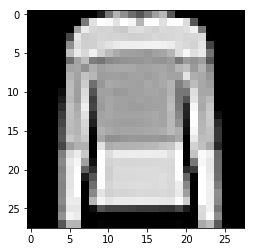

In [ ]:
plt.imshow(xc2[2],cm.gray)
plt.show()

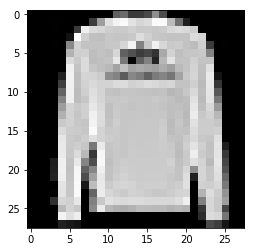

In [ ]:
plt.imshow(xc2[3],cm.gray)
plt.show()

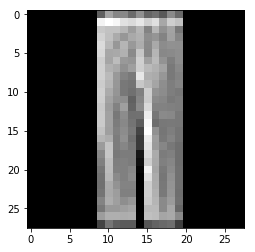

In [ ]:
plt.imshow(xc2[4],cm.gray)
plt.show()

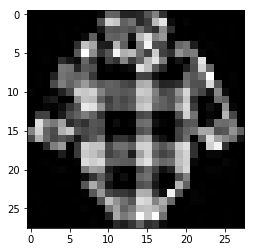

In [ ]:
plt.imshow(xc2[5],cm.gray)
plt.show()

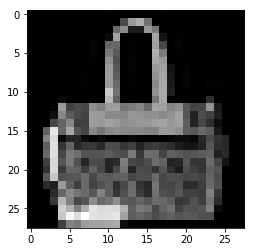

In [ ]:
plt.imshow(xc2[45],cm.gray)
plt.show()

In [ ]:
import tensorflow as tf
!pip install np_utils

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling1D,AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Dense
model = Sequential()
model.add(Conv2D(28, (3, 3), padding="same",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dropout(0.20))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
xc=X_train
xc2=[]
xcv=X_train.head(40200)
xcv1=(np.array(xcv))

for t in xcv1:
    xc2.append(t.reshape(28,28))
print(np.array(xc2).shape)
model.fit(np.array(xc2).reshape(19339,28,28,1), to_categorical(y_train,10),epochs=5, batch_size=10, verbose=1)

(19339, 28, 28)
Epoch 1/5
1934/1934 [==============================] - 25s 13ms/step - loss: 0.6018 - accuracy: 0.7677
Epoch 2/5
1934/1934 [==============================] - 24s 12ms/step - loss: 0.0795 - accuracy: 0.8586
Epoch 3/5
1934/1934 [==============================] - 24s 12ms/step - loss: 0.0680 - accuracy: 0.8783
Epoch 4/5
1934/1934 [==============================] - 24s 12ms/step - loss: 0.0620 - accuracy: 0.8918
Epoch 5/5
1934/1934 [==============================] - 24s 13ms/step - loss: 0.0588 - accuracy: 0.8977


In [ ]:
xc1=X_test
xc3=x2.head(10000)
xc31=np.array(xc3)
xc4=[]
for t in xc31:
    xc4.append(t[1:785].reshape(28,28))
yu=model.predict_classes(np.array(xc4).reshape(-1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(yu,y2))

0.8742


In [ ]:
print(confusion_matrix(yu,y2))

[[874   0  28  19   3   0 216   1   7   0]
 [  1 987   1   9   1   1   4   0   1   0]
 [ 11   0 742   3  81   0  51   0   1   0]
 [ 24   9  16 929  61   1  27   0   2   0]
 [  5   1 141  16 778   0  90   0   2   0]
 [  2   0   0   1   0 960   0  24   4   6]
 [ 72   1  65  21  74   0 606   0   7   0]
 [  0   0   0   0   0  18   0 921   2  23]
 [ 11   2   6   2   2   2   6   0 974   0]
 [  0   0   1   0   0  18   0  54   0 971]]


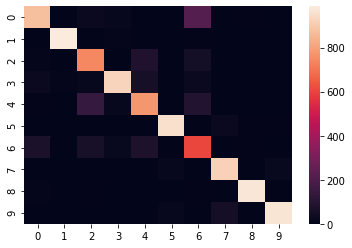

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(yu,y2))

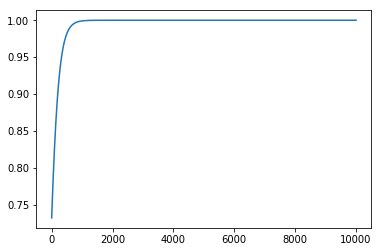

In [ ]:
import math
def sigmoid():
    y=[]
    x=1
    for x1 in range(0,10000):
           x=x+0.006
           y.append(1/(1+math.exp((-x))))
    plt.plot(y)
sigmoid()
plt.show()